In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing.sequence import TimeseriesGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Import data

In [2]:
df=pd.read_csv(r"C:\Users\kater\Desktop\Training\Time Series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\Miles_Traveled.csv", 
              index_col="DATE", parse_dates=True)

In [3]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [4]:
df.columns=["Values"]
df.head()

,Values
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [5]:
df.index.freq="MS"

**Plot the data**

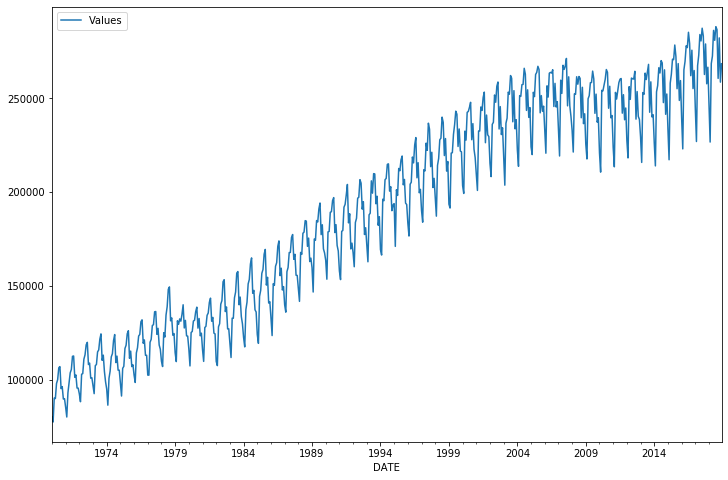

In [6]:
df.plot(figsize=(12,8))

**Perform seasonal decomposition and plot them out.**

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

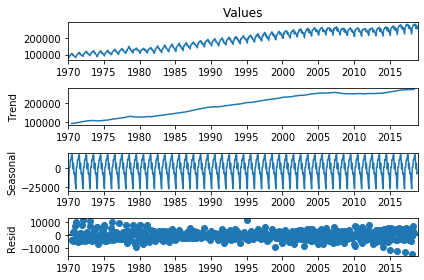

In [10]:
results=seasonal_decompose(df["Values"])
results.plot();

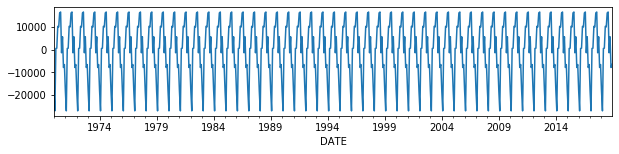

In [12]:
results.seasonal.plot(figsize=(10,2))

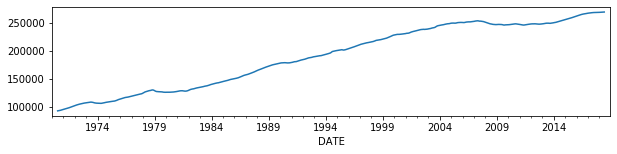

In [13]:
results.trend.plot(figsize=(10,2))

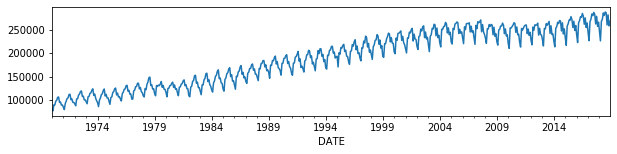

In [14]:
results.observed.plot(figsize=(10,2))

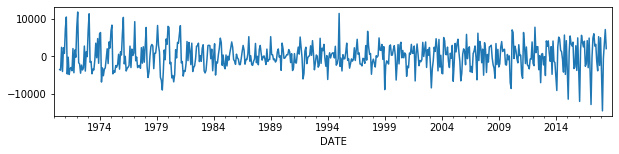

In [15]:
results.resid.plot(figsize=(10,2))

## Train Test Split

In [16]:
len(df)

588

In [17]:
588-12

576

In [18]:
train=df.iloc[:576]
test=df.iloc[576:]

In [19]:
len(test)

12

## Scale Data

In [21]:
scaler=MinMaxScaler()

In [22]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
scaled_train=scaler.transform(train)

In [24]:
scaled_test=scaler.transform(test)

In [25]:
scaled_train

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ],
       [0.03760821],
       [0.01274887],
       [0.07399679],
       [0.09844641],
       [0.12488268],
       [0.13335334],
       [0.16685961],
       [0.16769811],
       [0.11361547],
       [0.11949919],
       [0.08629306],
       [0.0861025 ],
       [0.07157184],
       [0.05159575],
       [0.12140962],
       [0.12289603],
       [0.15961334],
       [0.17066617],
       [0.19605433],
       [0.20233825],
       [0.14592594],
       [0.14958957],
       [0.11123816],
       [0.11242443],
       [0.09157651],
       [0.07205778],
       [0.1431532 ],
       [0.14615462],
       [0.17806966],
       [0.18302438],
       [0.21078032],
       [0.22383886],
       [0.15669292],
       [0.16982768],
       [0.12834146],
       [0.102

## Time Series Generator

In [30]:
n_input=12
n_features=1

generator=TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

## Create the Model

In [27]:
model=Sequential()

model.add(LSTM(150, activation="relu",input_shape=(n_input, n_features) ))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**Fit the model to the generator**

In [31]:
model.fit(generator, epochs=25)

Epoch 1/25
564/564 [==============================] - 5s 10ms/step - loss: 0.0128
Epoch 2/25
564/564 [==============================] - 5s 8ms/step - loss: 0.0062
Epoch 3/25
564/564 [==============================] - 5s 8ms/step - loss: 0.0051
Epoch 4/25
564/564 [==============================] - 4s 8ms/step - loss: 0.0042
Epoch 5/25
564/564 [==============================] - 5s 8ms/step - loss: 0.0024
Epoch 6/25
564/564 [==============================] - 5s 8ms/step - loss: 0.0014
Epoch 7/25
564/564 [==============================] - 5s 8ms/step - loss: 0.0012
Epoch 8/25
564/564 [==============================] - 5s 8ms/step - loss: 0.0013
Epoch 9/25
564/564 [==============================] - 5s 8ms/step - loss: 0.0010
Epoch 10/25
564/564 [==============================] - 6s 10ms/step - loss: 8.9536e-04
Epoch 11/25
564/564 [==============================] - 8s 13ms/step - loss: 8.4877e-04
Epoch 12/25
564/564 [==============================] - 5s 9ms/step - loss: 9.8587e-04
Epoch 13/2

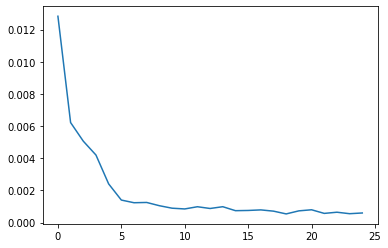

In [36]:
losses=model.history.history["loss"]

plt.plot(losses)

## Evaluate on the test data

In [37]:
first_evaluation_batch=scaled_train[-12:]
first_evaluation_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [38]:
first_evaluation_batch=first_evaluation_batch.reshape((1, n_input, n_features))

In [39]:
model.predict(first_evaluation_batch)

array([[0.78178227]], dtype=float32)

In [40]:
test_predictions=[]

#Last n_input point from the train set
first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input, n_features))

#how far into the future will I forecast
# if 24 in the future then put 24 instead of len(test)
for i in range(len(test)):
    
    #1time step ahead of the historical 12 points
    current_predictions=model.predict(current_batch)[0]
    
    #store that predictions
    test_predictions.append(current_predictions)
    
    #update the current batch to include the prediction
    current_batch=np.append(current_batch[:,1:,:], [[current_predictions]], axis=1)

In [41]:
test_predictions

[array([0.78178227], dtype=float32),
 array([0.7122796], dtype=float32),
 array([0.87424123], dtype=float32),
 array([0.909595], dtype=float32),
 array([0.96257657], dtype=float32),
 array([0.9517707], dtype=float32),
 array([0.97972053], dtype=float32),
 array([0.9585949], dtype=float32),
 array([0.87585783], dtype=float32),
 array([0.9329916], dtype=float32),
 array([0.8467032], dtype=float32),
 array([0.87605417], dtype=float32)]

## Invert predictions transformations

In [42]:
true_predictions=scaler.inverse_transform(test_predictions)

In [43]:
true_predictions

array([[241538.88014567],
       [226950.20405298],
       [260946.10902107],
       [268366.90275335],
       [279487.78422636],
       [277219.62650031],
       [283086.31957501],
       [278652.03193581],
       [261285.43438482],
       [273277.87484372],
       [255165.84244931],
       [261326.64586437]])

In [44]:
test["Predictions"]=true_predictions

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
test

,Values,Predictions
DATE,,
2018-01-01,245695.0,241538.880146
2018-02-01,226660.0,226950.204053
2018-03-01,268480.0,260946.109021
2018-04-01,272475.0,268366.902753
2018-05-01,286164.0,279487.784226
2018-06-01,280877.0,277219.626500
2018-07-01,288145.0,283086.319575
2018-08-01,286608.0,278652.031936
2018-09-01,260595.0,261285.434385


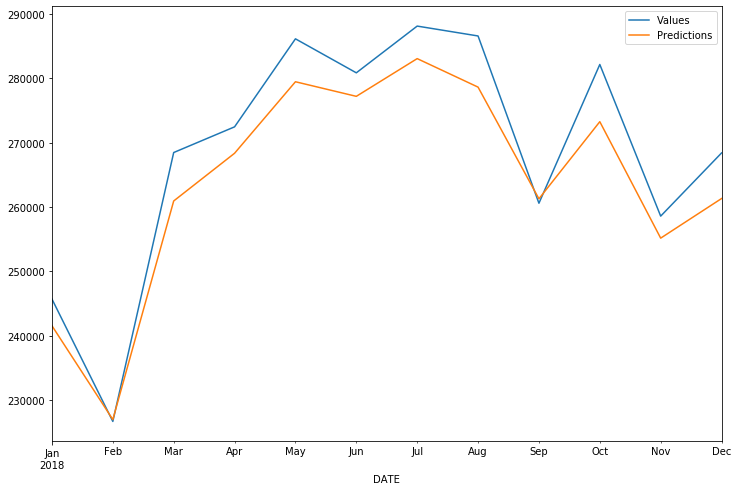

In [45]:
test.plot(figsize=(12,8))

In [48]:
model.save("mymodel.h5")